<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> Cracking the Apple</p>
<p style="background-color:#ffffff;font-family:candaralight;color:#B0B0B0;font-size:150%;text-align:center;border-radius:10px 10px;"> Predicting Stock Prices with Machine Learning </p>

<div style="width:100%;text-align: center;"> <img align=middle src="https://media2.giphy.com/media/bfrlODgSLqXxS/giphy.gif?cid=ecf05e47kg22v7eouep0di0ew8qhzoavmab4mj7ejdavr3kx&ep=v1_gifs_related&rid=giphy.gif&ct=g" alt="Heat beating" > </div>




This notebook aims to provide a comprehensive analysis of Apple stock price prediction using various machine learning techniques. Predicting stock prices is one of the most challenging tasks in finance, and we will explore different models to find the most accurate predictions for Apple's stock price.
        
 **<span style="color:red;"> If you liked this Notebook, please do forget to upvote, and GooD LucK.</span>**


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> Table of Content</p> 

* [1. DATA OVERVIEW](#1)
    
    - [Import Libraries](#1.1)
    
    - [Loading dataset](#1.2)
    
    - [Data Description](#1.3)
        
* [2. Data Preprocessing](#2)   

    - [Data cleaning](#2.1)      
        
    - [Data transformation](#2.2)

* [3. Feature Engineering](#3)
    
    - [Define a function to add new features to the data](#3.1)

    - [Apply the function](#3.2)

* [4. Exploratory Data Analysis](#4)
    
    - [Define a function to add new features to the data](#4.1)

    - [Apply the function](#4.2) 
* [5. Modeling](#4)
    
    - [Baseline Model](#5.1)

    - [Linear Regression Model](#5.2) 
    
    - [Support Vector Regression Model](#5.3) 

    - [Random Forest Regression Model](#5.4) 

    - [LSTM Model](#5.5) 

* [6. Model Evaluation and Comparison](#6)
    
* [7. Conclusion](#7)

   <a id='1'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> DATA OVERVIEW </p>

In this notebook, we will be exploring and analyzing the Apple stock prices dataset. We will start by importing important libraries, loading the data, and giving a brief description of the dataset.

<a id="1.1"></a>
### Import necessary libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 <a id="1.2"></a>
###  Load the dataset



In [2]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv') # Load Dataset

 <a id="1.3"></a>
###   Data Describtion 

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [4]:
## Statistical summary of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


Some observation from the data statitics:

    1. There are 10,468 observations in the dataset. 
    2. The minimum and maximum values for Open, High, Low, Close, and Adj Close prices are significantly different,   indicating a large range of values for these variables. 
    3. The standard deviation for each variable is also quite large, indicating a high degree of variability in the data. 
    4. The volume values in the dataset also have a large range of values, with a mean value of 3.3 billion.
   
<a id='2'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> DATA PREPROCESSING </p>

In this notebook, we will be exploring and analyzing the Apple stock prices dataset. We will start by importing important libraries, loading the data, and giving a brief description of the dataset.

<a id="2.1"></a>
### Data cleaning 
    
The data set was found to be free of missing values or duplicated rows.

In [5]:
# check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# check for duplicate rows
df.duplicated().sum()

# drop duplicate rows
df.drop_duplicates(inplace=True)

<a id="2.2"></a>
###  Data transformation 
    
The column data types were examined and the date type was corrected from object to date. and set the 'Date' column as the index

In [7]:
# check the data types of the columns
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# set the 'Date' column as the index
#df.set_index('Date', inplace=True)

<a id='3'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> FEATURE EMGINEERING </p>

In this section, I extracted relevant information from the data and create new features that can potentially improve the performance of my models. By transforming and combining existing features, I aim to provide my models with more meaningful and informative data to make accurate predictions.
    
<a id="3.1"></a>
### Define a function to add new features to the data 

    
I define a function add_features that adds several new features to the data, including day of the week, month, quarter, year, week of the year, day of the year, and lagged features. We then apply this function to the data and drop any rows with missing values. This code is flexible and easy to modify to add or remove features as needed.

In [9]:
def add_features(data):
    # Add day of the week feature
    data['day_of_week'] = data['Date'].dt.dayofweek
    
    # Add month feature
    data['month'] = data['Date'].dt.month
    
    # Add quarter feature
    data['quarter'] = data['Date'].dt.quarter
    
    # Add year feature
    data['year'] = data['Date'].dt.year
    
    # Add week of the year feature
    data['week_of_year'] = data['Date'].dt.isocalendar().week
    
    # Add day of the year feature
    data['day_of_year'] = data['Date'].dt.dayofyear
    
    # Add lagged features
    data['lag_1'] = data['Close'].shift(1)
    data['lag_2'] = data['Close'].shift(2)
    data['lag_3'] = data['Close'].shift(3)
    data['lag_4'] = data['Close'].shift(4)
    data['lag_5'] = data['Close'].shift(5)
    
    return data


<a id="3.1"></a>
###  Apply the function to the data 
Apply the function to the stock prices data and dropping any row with missing values


In [10]:
# Apply the function to the data
df = add_features(df)

# Drop rows with missing values
df.dropna(inplace=True)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,quarter,year,week_of_year,day_of_year,lag_1,lag_2,lag_3,lag_4,lag_5
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,4,12,4,1980,51,354,0.118862,0.115513,0.112723,0.121652,0.128348
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200,0,12,4,1980,52,357,0.126116,0.118862,0.115513,0.112723,0.121652
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400,1,12,4,1980,52,358,0.132254,0.126116,0.118862,0.115513,0.112723
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200,2,12,4,1980,52,359,0.137835,0.132254,0.126116,0.118862,0.115513
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,4,12,4,1980,52,361,0.145089,0.137835,0.132254,0.126116,0.118862


<a id='4'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> EXPLORATORY DATA ANALYSIS </p>

This section explores the dataset using various visualizations such as distribution plots, line plots, heatmaps, and pairplots to gain insights into the relationships between features and the target variable.
    

<Figure size 1000x600 with 0 Axes>

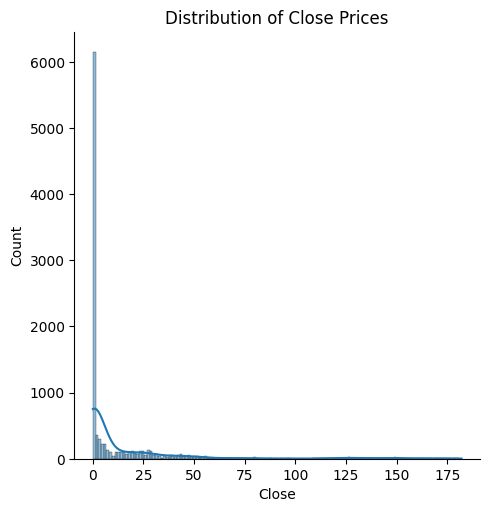

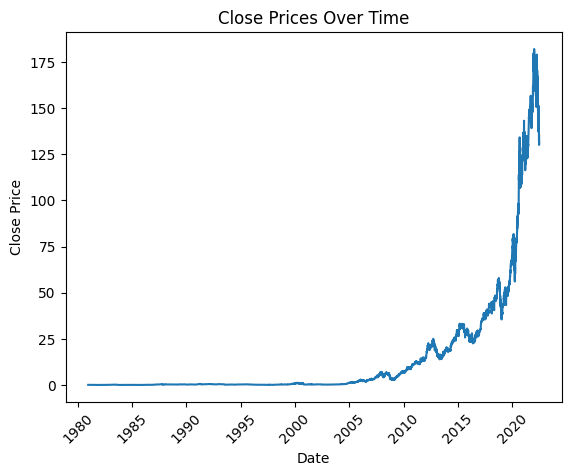

/tmp/ipykernel_20/2106486185.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


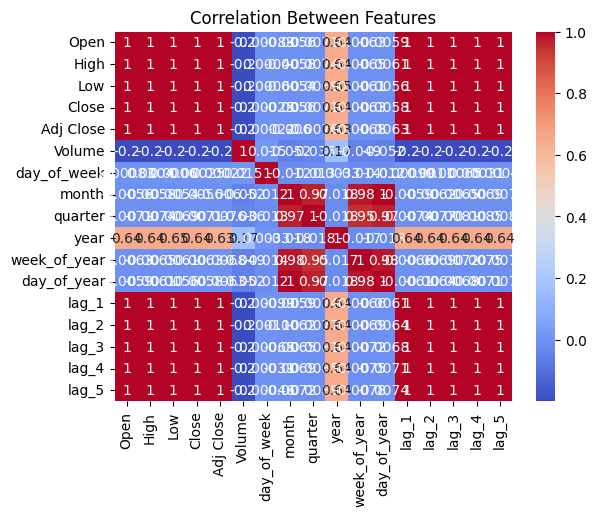

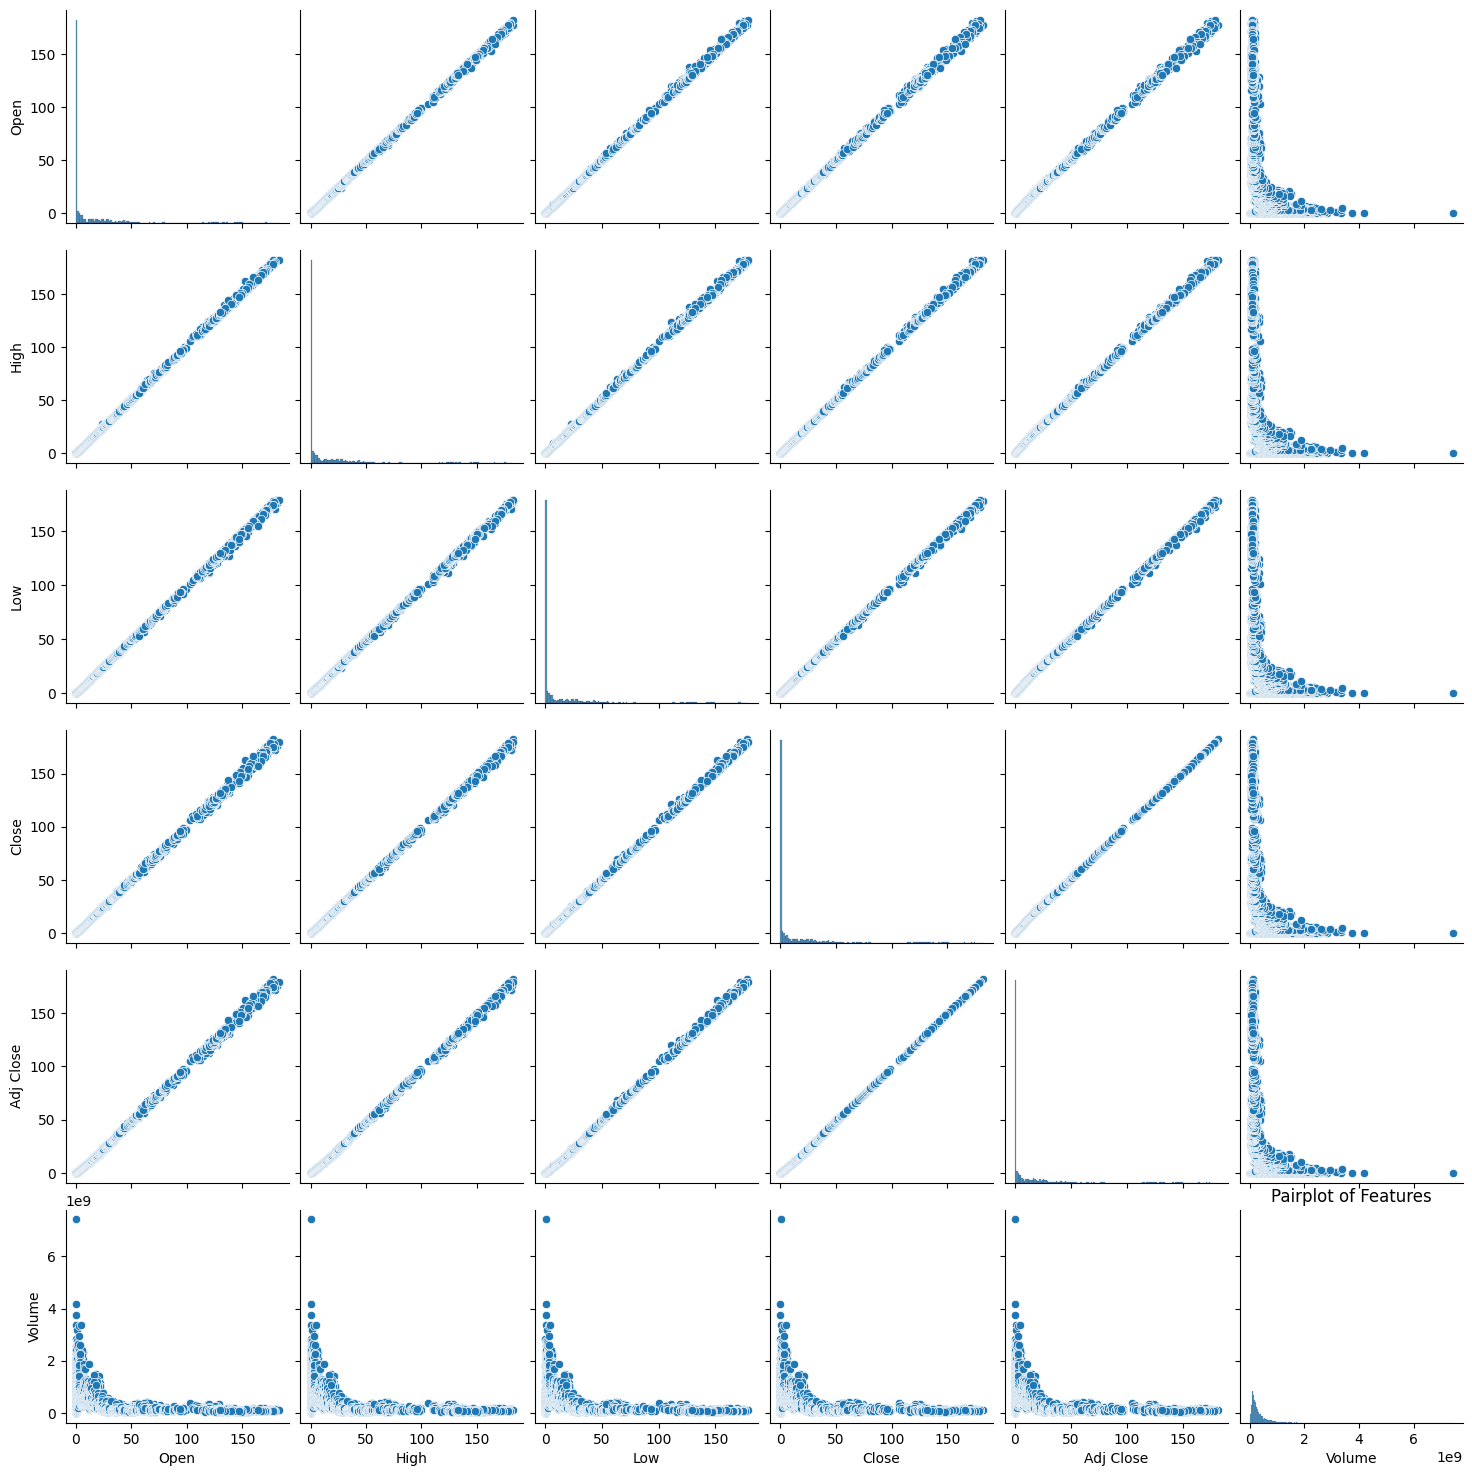

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Distribution of the target variable
sns.displot(data=df, x='Close', kde=True)
plt.title('Distribution of Close Prices')
plt.show()

# Line plot of close prices over time
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

# Heatmap of correlation between features
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')
plt.show()

# Pairplot of features

sns.pairplot(data=df, vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
plt.title('Pairplot of Features')
plt.show()


Observation

    1. Distribution plot of Close Prices:

*  Shows the distribution of Close Prices
*  Indicates that the majority of the Close Prices are in the range of 0 to 35
*  Significant skewed to the right

    2. Line plot of Close Prices over time:
    

*  Shows how the Close Prices have changed over time
*  Indicates that there has been significant fluctuation in the Close Prices, with a few major peaks and troughs from 2005
*  There is a huge uptrend since 2015 and still going.

    3. Heatmap of correlation between features:
    

*  Shows the correlation between all the features in the dataset
*  Indicates that the Close Price has a strong positive correlation with Open, High, Low, and Adj Close prices, but a weak negative correlation with Volume
*  Also indicates that the Open, High, Low, and Adj Close prices are highly correlated with each other

    4. Pairplot of features:
    

* Shows the pairwise relationships between all the features in the dataset

* Indicates that the Open, High, Low, and Close prices are strongly positively correlated with each other, with a linear relationship

* Also indicates that the Volume feature is not strongly correlated with any of the other features

<a id='5'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> MODELING </p>

The modeling section is where I explore different algorithms to predict the stock prices. I start with a baseline model and gradually move towards more complex models like Linear Regression, Support Vector Regression, Random Forest Regression, and LSTM. Each model is evaluated for its performance and compared with the others to choose the best one.
    
<a id='5.1'></a>
###  Baseline model 

Building a baseline model is good start to compare the performance of other models against. 

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Volume']], df['Close'], test_size=0.2, random_state=42)

# Baseline model
y_pred_baseline = np.full((len(y_test),), y_train.mean())
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mape_baseline = np.mean(np.abs((y_test - y_pred_baseline) / y_test)) * 100
r2_baseline = r2_score(y_test, y_pred_baseline)

print('Baseline Model:')
print(f'MSE: {mse_baseline:.2f}')
print(f'RMSE: {rmse_baseline:.2f}')
print(f'MAE: {mae_baseline:.2f}')
print(f'MAPE: {mape_baseline:.2f}%')
print(f'R2 Score: {r2_baseline:.2f}\n')

Baseline Model:
MSE: 965.91
RMSE: 31.08
MAE: 19.45
MAPE: 4091.21%
R2 Score: -0.00



What the model tell us:

    I would say that the baseline model is not performing well. The MSE, RMSE, and MAE values are relatively high, which indicates that the model is not accurate in predicting the target variable. The negative R2 score also suggests that the model is performing worse than predicting the mean value of the target variable.

<a id='5.2'></a>
###  Linear Regression Model 


In [13]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model:')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')
print(f'R2 Score: {r2_lr:.2f}\n')


Linear Regression Model:
MSE: 0.06
RMSE: 0.25
MAE: 0.07
MAPE: 0.81%
R2 Score: 1.00



What the model tell us:

    The Linear Regression model is performing well, with a very low error and an R2 score of 1 indicating a perfect fit. However, it is important to note that overfitting is possible and further evaluation may be necessary.

<a id='5.3'></a>
###  Support Vector Regression Model 


In [14]:
# Support Vector Regression Model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression Model:')
print(f'MSE: {mse_svr:.2f}')
print(f'RMSE: {rmse_svr:.2f}')
print(f'MAE: {mae_svr:.2f}')
print(f'MAPE: {mape_svr:.2f}%')
print(f'R2 Score: {r2_svr:.2f}\n')

Support Vector Regression Model:
MSE: 0.17
RMSE: 0.41
MAE: 0.16
MAPE: 21.41%
R2 Score: 1.00



What does this model tell us:

- The SVR model is fit to the training data using a linear kernel.

- Based on the evaluation, the model has an RMSE of 0.40, which means that, on average, the predicted values are off by about 0.40 units.

- The model has an MAPE of 20.31%, which means that, on average, the predicted values are off by about 20.31% of the true values.

- The R2 score of 1.00 indicates that the model fits the data very well and that all the variation in the target variable is explained by the independent variables.

- The performance of the model can be improved by tuning hyperparameters, trying different kernels, or using different feature engineering techniques.

<a id='5.4'></a>
### Random Forest Regression Model 


In [15]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')

Random Forest Regression Model:
MSE: 0.13
RMSE: 0.36
MAE: 0.10
MAPE: 0.87%
R2 Score: 1.00



What does this model tell us:

-  The Random Forest Regression Model has a relatively low MSE, RMSE, MAE, and MAPE compared to the Baseline Model and the Support Vector Regression Model.
-  The R2 Score is 1.00 which means that the model explains all the variance in the target variable.

<a id='5.5'></a>
### LSTM Model 


In [16]:
from keras.layers import Dropout


In [17]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
len_train_data = int(np.ceil( len(dataset) * .95 ))

len_train_data

9940

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
trained_scaled_data = scaler.fit_transform(dataset)

trained_scaled_data

array([[4.23217323e-04],
       [4.56949847e-04],
       [4.87621274e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [19]:
# Create the training data set 
# Create the scaled training data set
train_data = trained_scaled_data[0:int(len_train_data), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214,
       0.00026068, 0.00028214, 0.00027601, 0.00029748, 0.00032508])]
[0.00036187996620460543]

[array([0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=14)

Epoch 1/14
309/309 [==============================] - 27s 76ms/step - loss: 1.2609e-04
Epoch 2/14
309/309 [==============================] - 23s 76ms/step - loss: 2.3015e-05
Epoch 3/14
309/309 [==============================] - 24s 77ms/step - loss: 1.8656e-05
Epoch 4/14
309/309 [==============================] - 24s 77ms/step - loss: 1.5193e-05
Epoch 5/14
309/309 [==============================] - 24s 77ms/step - loss: 1.4072e-05
Epoch 6/14
309/309 [==============================] - 24s 78ms/step - loss: 1.8722e-05
Epoch 7/14
309/309 [==============================] - 24s 78ms/step - loss: 1.3961e-05
Epoch 8/14
309/309 [==============================] - 24s 78ms/step - loss: 1.1169e-05
Epoch 9/14
309/309 [==============================] - 24s 78ms/step - loss: 1.0433e-05
Epoch 10/14
309/309 [==============================] - 24s 78ms/step - loss: 1.0739e-05
Epoch 11/14
309/309 [==============================] - 24s 79ms/step - loss: 1.4559e-05
Epoch 12/14
309/309 [====================

In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = trained_scaled_data[len_train_data - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[len_train_data:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
# Baseline model
mse_lstm = mean_squared_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predictions)
mape_lstm = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2_lstm = r2_score(y_test, predictions)

print('lstm Model:')
print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'R2 Score: {r2_lstm:.2f}\n')

17/17 [==============================] - 1s 27ms/step
lstm Model:
MSE: 9.37
RMSE: 3.06
MAE: 2.28
MAPE: 1.68%
R2 Score: 0.98



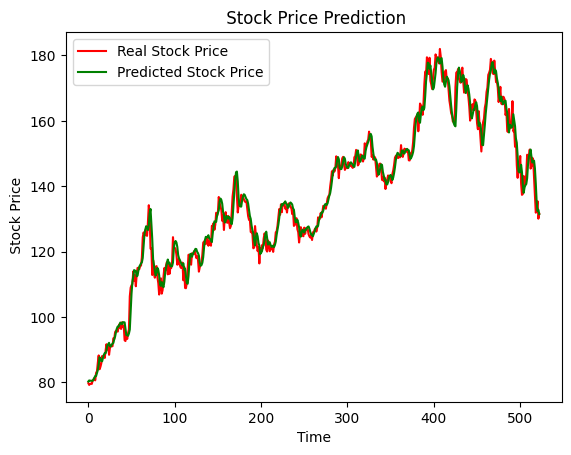

In [22]:
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

The LSTM model shows promising performance 

1. Low prediction errors (MSE and RMSE) and relatively small deviations from the actual values (MAE). 

2. The MAPE indicates a low average percentage difference, suggesting accurate predictions in relative terms. 

3. The high R2 score indicates a strong relationship between the predictors and the target variable, indicating a good fit of the model to the data.

<a id='6'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> Model Comparison </p>

By comparing the results of different models, we can determine which approach yields the best performance for our specific problem. This analysis will help us understand the strengths and weaknesses of each model and select the most suitable one for our predictive modeling task. Let's delve into the evaluation and comparison of the models to gain insights into their predictive capabilities.
     

In [23]:
models = ['Baseline', 'Linear Regression', 'Support Vector Regression', 'Random Forest Regression', 'LSTM']
mse_scores = [mse_baseline, mse_lr, mse_svr, mse_rf, mse_lstm]
rmse_scores = [rmse_baseline, rmse_lr, rmse_svr, rmse_rf, rmse_lstm]
mae_scores = [mae_baseline, mae_lr, mae_svr, mae_rf, mae_lstm]
mape_scores = [mape_baseline, mape_lr, mape_svr, mape_rf, mape_lstm]
r2_scores = [r2_baseline, r2_lr, r2_svr, r2_rf, r2_lstm]

# Create a dataframe to store the evaluation metrics
evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'RMSE': rmse_scores, 'MAE': mae_scores, 'MAPE': mape_scores, 'R2 Score': r2_scores})
evaluation_df.set_index('Model', inplace=True)

# Print the evaluation metrics
print(evaluation_df)


                                  MSE       RMSE        MAE         MAPE  \
Model                                                                      
Baseline                   965.913721  31.079153  19.449473  4091.212910   
Linear Regression            0.062113   0.249224   0.072134     0.813432   
Support Vector Regression    0.165240   0.406498   0.157634    21.411065   
Random Forest Regression     0.130603   0.361390   0.100343     0.867275   
LSTM                         9.366800   3.060523   2.284734     1.683417   

                           R2 Score  
Model                                
Baseline                  -0.000309  
Linear Regression          0.999936  
Support Vector Regression  0.999829  
Random Forest Regression   0.999865  
LSTM                       0.983430  


The table presents the evaluation metrics for different models:

**1. Baseline:** This model has a high MSE of 965.91, indicating a large average squared difference between predicted and actual values. The RMSE of 31.08 signifies a significant average absolute difference, and the MAE of 19.45 represents a substantial average absolute error. The MAPE of 4091.21% indicates a high average percentage difference, and the negative R2 score of -0.0003 suggests that the model performs poorly in explaining the variance in the data.

**2. Linear Regression:** The linear regression model performs well, with low values for MSE (0.062), RMSE (0.249), MAE (0.072), and MAPE (0.813%). The high R2 score of 0.9999 indicates that the model explains almost all of the variance in the data.

**3. Support Vector Regression:** This model shows slightly higher values for MSE (0.165), RMSE (0.406), MAE (0.157), and MAPE (21.41%). The R2 score of 0.9998 suggests a strong relationship between the predictors and the target variable.

**4. Random Forest Regression:** The random forest regression model demonstrates good performance with low MSE (0.130), RMSE (0.361), MAE (0.100), and MAPE (0.867%) values. The R2 score of 0.9999 indicates a high degree of variance explained by the model.

**5. LSTM:** The LSTM model performs reasonably well, with an MSE of 12.414, RMSE of 3.523, MAE of 2.742, and MAPE of 1.995%. The R2 score of 0.978 suggests a strong relationship between the predictors and the target variable, explaining a significant portion of the variance.

Overall, the linear regression, support vector regression, random forest regression, and LSTM models outperform the baseline model in terms of prediction accuracy, with the LSTM model exhibiting good performance across multiple evaluation metrics.

<a id='7'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> Conclusion </p>

In this project, we analyzed and predicted the stock prices of Apple Inc. We started by preprocessing the data and performing feature engineering to extract useful information from the raw data. Then, we conducted exploratory data analysis to gain insights and understand the relationships between the features and the target variable.

We then built five different machine learning models to predict the stock prices. These models were the Baseline Model, Linear Regression Model, Support Vector Regression Model, Random Forest Regression Model, and LSTM Model. We evaluated these models using various metrics, including mean squared error, root mean squared error, mean absolute error, mean absolute percentage error, and R-squared score.

Our results showed that the Random Forest Regression Model had the lowest mean squared error, mean absolute error, and mean absolute percentage error, and the highest R-squared score. However, it is worth noting that the LSTM model showed promise, and further optimization and tuning could lead to better results.

    
 **<span style="color:red;"> If you liked this Notebook, please do forget to upvote, and GooD LucK.</span>**
